# PCA

![pca2d](PCA_2d.svg)
![pca](pca.png)

## Customer Satisfaction Analysis

A survey in order to evaluate 20 different healthcare structures. 200 customers have evaluated, with a 1-10 scale, each of six features of the service:

1. Courtesy
2. Clarity
3. Competence
4. Condition (of the structure)
5. Promptness (of the service)
6. Opening times

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt 

In [2]:
df2 = pd.read_csv("csat.csv")
print(df2.head(10))

df2.describe()


   Courtesy  Clarity  Competence  Condition  Promptness  Opening_times
0         7        5           9          8           6              7
1         5        6           8          4           4              6
2         5        5           8          7           7              7
3         6        6           9          7           6              7
4         7        5          10          4           3              6
5         6        4           8          4           5              6
6         5        6           9          4           3              5
7         5        5           8          5           4              6
8         4        4           7          7           5              6
9         5        5           8          7           6              7


,Courtesy,Clarity,Competence,Condition,Promptness,Opening_times
count,20.000000,20.000000,20.000000,20.000000,20.000000,20.000000
mean,4.800000,4.600000,7.600000,6.150000,5.000000,6.300000
std,1.105013,0.994723,1.535544,1.814416,1.169795,0.732695
min,3.000000,3.000000,5.000000,3.000000,3.000000,5.000000
25%,4.000000,4.000000,6.750000,4.750000,4.000000,6.000000
50%,5.000000,5.000000,8.000000,6.500000,5.000000,6.000000
75%,5.000000,5.000000,8.250000,7.250000,6.000000,7.000000
max,7.000000,6.000000,10.000000,9.000000,7.000000,7.000000


<Axes: >

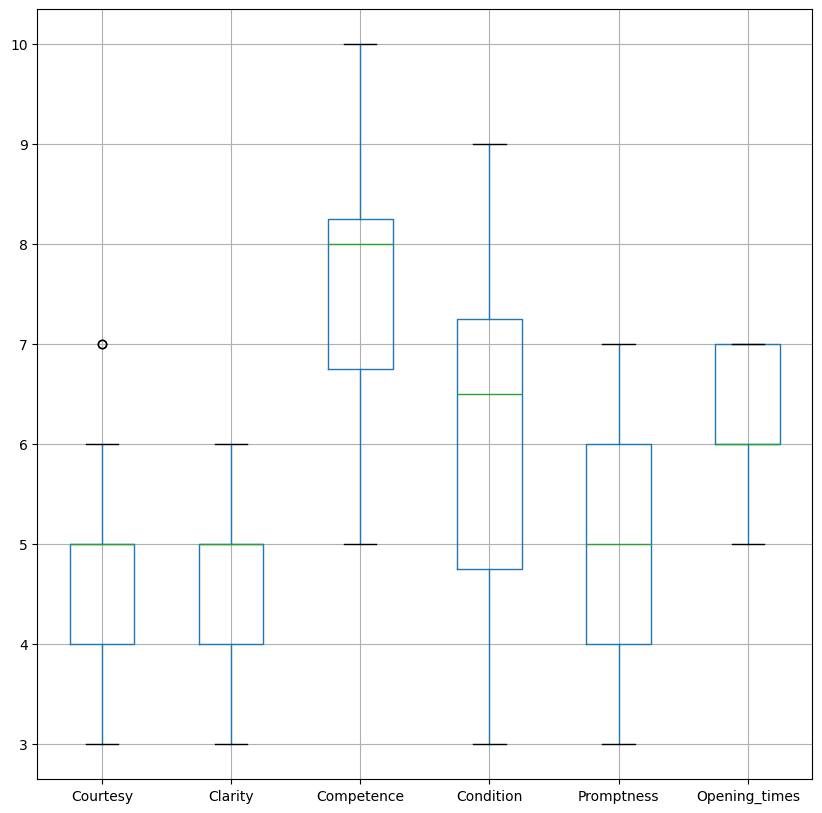

In [3]:
%matplotlib inline
df2.boxplot(figsize=(10,10))


<Axes: >

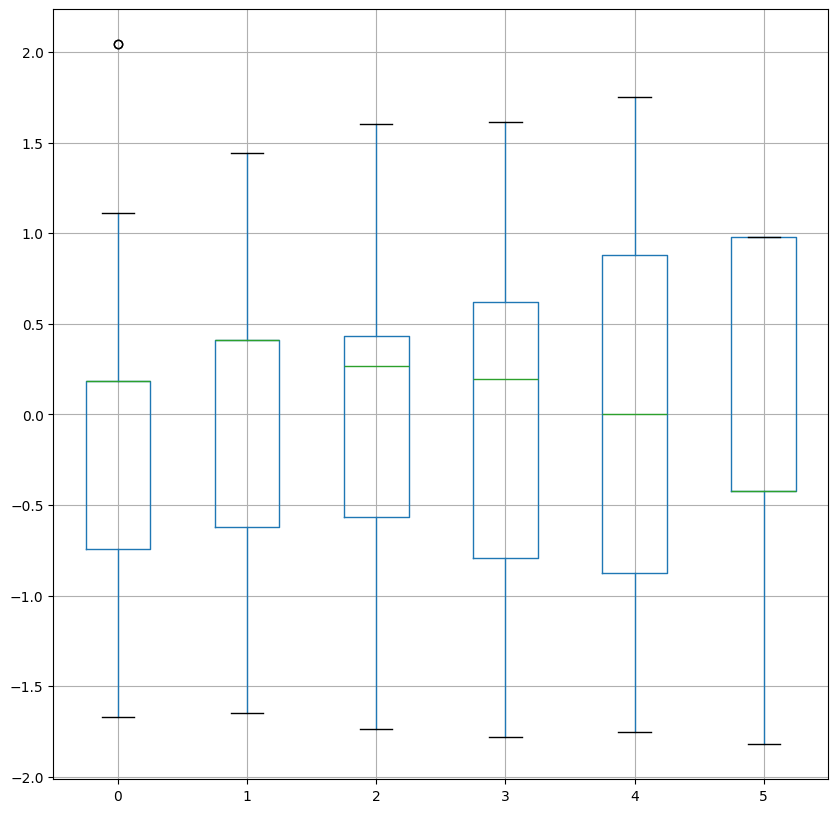

In [4]:
#dataset scaling and visualizing
from sklearn.preprocessing import StandardScaler

scaler2 = StandardScaler(copy=False) 
# Here, we create an instance of StandardScaler. 
# The copy=False argument indicates that the original data will be modified in place if possible, which can save memory.

scaler2.fit(df2.astype(float)) 
# The fit() method calculates the mean and standard deviation of each feature in the DataFrame df2 (converted to float). 
# This information will be used for scaling the data.

scaler2.transform(df2.astype(float))
# This line transforms the original data based on the mean and standard deviation calculated in the fit() step. 
# Since the transformed data is not being stored, this line does not have an effect on the DataFrame.

df2_scaled=pd.DataFrame(scaler2.transform(df2.astype(float))) 
# Purpose: This line applies the transformation to the original DataFrame df2 (after converting it to float), 
# scaling each feature so that it has a mean of 0 and a standard deviation of 1.
# Output: The result of the transformation is wrapped in a pd.DataFrame(), creating a new DataFrame called df2_scaled. 
# Each column in this new DataFrame represents a feature that has been standardized.

df2_scaled.boxplot(figsize=(10,10))

- This line applies the `StandardScaler` transformation to the `df2` DataFrame (after converting it to float). The `transform()` method scales the data, adjusting each feature to have a mean of 0 and a standard deviation of 1.
- The result is wrapped in `pd.DataFrame()` to create a new DataFrame named `df2_scaled`.
Next line assigns the original column names from `df2` to the new scaled DataFrame `df2_scaled`.
It ensures that you can identify which columns correspond to which features in the scaled data.

In [5]:
df2_scaled=pd.DataFrame(scaler2.transform(df2.astype(float))) 
df2_scaled.columns=df2.columns
df2_scaled.head()

,Courtesy,Clarity,Competence,Condition,Promptness,Opening_times
0,2.042649,0.412568,0.935414,1.046100,0.877058,0.980196
1,0.185695,1.443990,0.267261,-1.215737,-0.877058,-0.420084
2,0.185695,0.412568,0.267261,0.480640,1.754116,0.980196
3,1.114172,1.443990,0.935414,0.480640,0.877058,0.980196
4,2.042649,0.412568,1.603567,-1.215737,-1.754116,-0.420084


### Interpretation of the Output
The `apply()` method will execute the lambda function for each column in `df2`, resulting in a DataFrame where each column contains the correlation coefficients of the original columns with the current column.
The output will be a DataFrame of shape (n, n), where n is the number of columns in `df2`. Each entry (i, j) in the resulting DataFrame represents the correlation between column i and column j.
- Diagonal Values: The diagonal elements (where the row and column are the same) will always be 1 because any column is perfectly correlated with itself.
- Correlation Coefficients: The values range from -1 to 1:
    - 1 indicates a perfect positive correlation.
    - -1 indicates a perfect negative correlation.
    - 0 indicates no correlation.
- Off-Diagonal Values: These values show how strongly each pair of columns is correlated. For example, if the correlation between columns A and B is 0.654321, it indicates a moderate positive correlation.

In [6]:
df2.apply(lambda s: df2.corrwith(s))

,Courtesy,Clarity,Competence,Condition,Promptness,Opening_times
Courtesy,1.000000,0.545861,0.694808,-0.115503,0.000000,0.143014
Clarity,0.545861,1.000000,0.544426,-0.081652,0.045231,0.101100
Competence,0.694808,0.544426,1.000000,0.003778,-0.058601,-0.121628
Condition,-0.115503,-0.081652,0.003778,1.000000,0.719114,0.439450
Promptness,0.000000,0.045231,-0.058601,0.719114,1.000000,0.798282
Opening_times,0.143014,0.101100,-0.121628,0.439450,0.798282,1.000000


In [7]:
corr = df2.corr()
corr.style.background_gradient(cmap='coolwarm', vmin=-1, vmax=1)

,Courtesy,Clarity,Competence,Condition,Promptness,Opening_times
Courtesy,1.000000,0.545861,0.694808,-0.115503,-0.000000,0.143014
Clarity,0.545861,1.000000,0.544426,-0.081652,0.045231,0.101100
Competence,0.694808,0.544426,1.000000,0.003778,-0.058601,-0.121628
Condition,-0.115503,-0.081652,0.003778,1.000000,0.719114,0.439450
Promptness,-0.000000,0.045231,-0.058601,0.719114,1.000000,0.798282
Opening_times,0.143014,0.101100,-0.121628,0.439450,0.798282,1.000000


In [8]:
#PCA fit
from sklearn.decomposition import PCA
# we can choose the number of components e.g. 10, the percentage of the total variance or set it to None (that means it automatically chooses the number of components)
pca2 = PCA()
pca2.fit(df2_scaled) #The fit learns some quantities from the data, most importantly the "components" and "explained variance"

PCA()

### Transforming the Data  
To reduce the dimensionality of your dataset, we can use the `transform()` method:
df2_pca = pd.DataFrame(pca2.transform(df2_scaled))

In [9]:
#let's use the pca to transform the dataset
df2_pca = pd.DataFrame(pca2.transform(df2_scaled))
df2_pca

,0,1,2,3,4,5
0,1.213592,2.284217,0.227626,-0.943510,-0.639256,0.028990
1,-1.595084,0.785365,-0.803792,0.889361,0.095906,-0.086024
2,1.768841,0.908673,-0.239397,0.098422,0.453160,0.563923
3,0.930384,2.266028,-0.278082,0.290028,-0.018155,-0.015550
4,-2.474352,1.951528,-0.139969,-1.153190,-0.197307,-0.571159
5,-0.983820,0.337580,-0.430245,-1.220114,0.102566,0.764267
6,-3.007233,0.806971,0.268340,1.046038,0.017288,-0.045829
7,-1.211056,0.258626,-0.183017,0.155048,-0.018583,-0.230788
8,0.224336,-1.040537,0.592068,0.125843,-0.048535,0.033514
9,1.227878,0.789717,-0.222861,0.077645,0.212176,-0.071421


In [10]:
#Let's analyse what happened
#VISUALIZE The amount of variance explained by each of the 10 selected principal components.
pd.DataFrame(pca2.explained_variance_).transpose()

,0,1,2,3,4,5
0,2.450138,2.313038,0.712002,0.507948,0.216216,0.116447


In [11]:
#VISUALIZE The percentage of variance explained by each of the selected components.
explained_var=pd.DataFrame(pca2.explained_variance_ratio_).transpose()
explained_var

,0,1,2,3,4,5
0,0.387939,0.366231,0.112734,0.080425,0.034234,0.018437


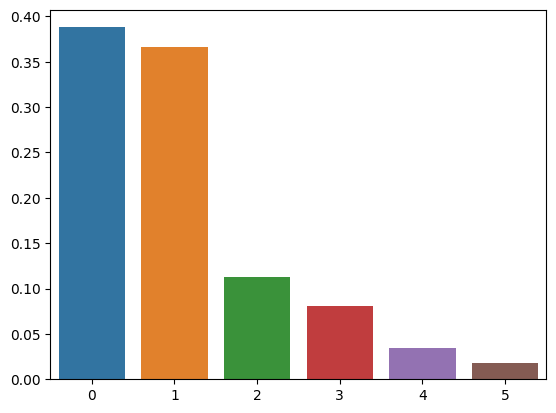

In [12]:
%matplotlib inline
import seaborn as sns
ax = sns.barplot( data=explained_var)

In [13]:
#VISUALIZE The cumulative percentage of explained variance
cum_explained_var=np.cumsum(pca2.explained_variance_ratio_)
cum_explained_var= pd.DataFrame(cum_explained_var).transpose()
cum_explained_var

,0,1,2,3,4,5
0,0.387939,0.75417,0.866903,0.947328,0.981563,1.0


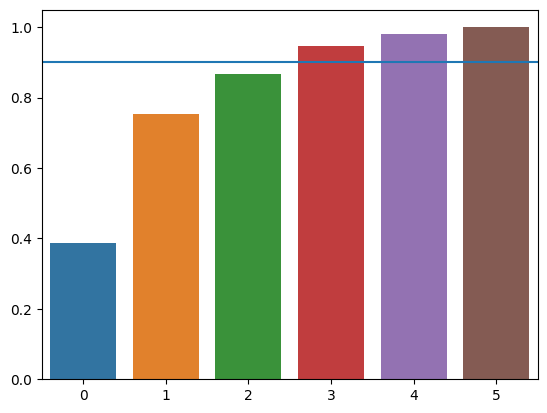

In [14]:
%matplotlib inline
import seaborn as sns
ax = sns.barplot(data=cum_explained_var)
ax.axhline(0.9)

In [15]:
pd.DataFrame(pca2.components_,index=['PC1','PC2','PC3','PC4','PC5','PC6'],columns=df2.columns)


,Courtesy,Clarity,Competence,Condition,Promptness,Opening_times
PC1,-0.108588,-0.082955,-0.166297,0.527831,0.616793,0.542802
PC2,0.586905,0.538902,0.562070,0.051455,0.135631,0.167814
PC3,-0.123933,-0.244882,0.467594,0.651152,-0.018854,-0.530731
PC4,-0.537682,0.790670,-0.155511,0.143601,0.023690,-0.200931
PC5,-0.545638,-0.131997,0.617261,-0.443239,0.274763,0.178578
PC6,0.203886,-0.012432,-0.180513,-0.278686,0.724403,-0.568564


We create a biplot for visualizing the results of Principal Component Analysis (PCA).  
A biplot combines a scatter plot of the principal component scores with arrows representing the loadings of the original features.
What to Expect from the Biplot

    Scatter Points: Each point in the scatter plot represents a sample (observation) projected onto the first two principal components.
    Arrows: The arrows indicate the direction and strength of each feature's influence on the principal components. Features with longer arrows have a greater impact on the variance explained by the principal components.
    Labels: The labels help you identify which features correspond to each arrow, making it easier to interpret the relationships between features and the principal components.

Interpretation of the Biplot

    Clusters: You may observe clusters of points that indicate groups of similar observations in the PCA space.
    Feature Relationships: The angles between arrows indicate correlations between features. For example:
        Arrows that point in the same direction indicate a positive correlation.
        Arrows that are orthogonal (90 degrees apart) indicate no correlation.
        Arrows that point in opposite directions indicate a negative correlation.

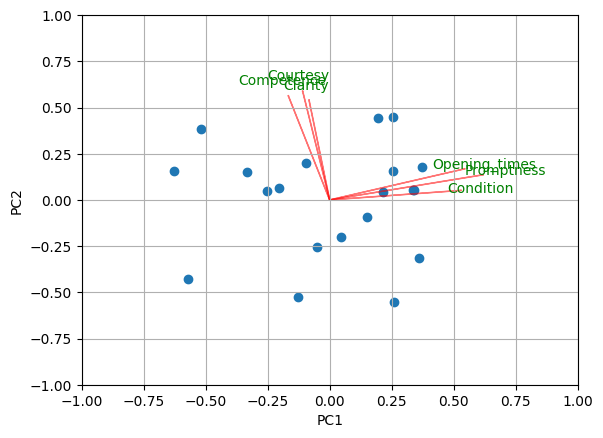

In [16]:
# Let's create the biplot with the loadings

def myplot(score,coeff,labels=None):
    xs = score[:,0]
    ys = score[:,1]
    n = coeff.shape[0]
    scalex = 1.0/(xs.max() - xs.min())
    scaley = 1.0/(ys.max() - ys.min())
    plt.scatter(xs * scalex,ys * scaley)
    for i in range(n):
        plt.arrow(0, 0, coeff[i,0], coeff[i,1],color = 'r',alpha = 0.5)
        if labels is None:
            plt.text(coeff[i,0]* 1.15, coeff[i,1] * 1.15, "Var"+str(i+1), color = 'g', ha = 'center', va = 'center')
        else:
            plt.text(coeff[i,0]* 1.15, coeff[i,1] * 1.15, labels[i], color = 'g', ha = 'center', va = 'center')
    plt.xlim(-1,1)
    plt.ylim(-1,1)
    plt.xlabel("PC{}".format(1))
    plt.ylabel("PC{}".format(2))
    plt.grid()

#Call the function. Use only the 2 PCs.
myplot(pca2.transform(df2_scaled)[:,0:2],np.transpose(pca2.components_[0:2, :]), df2.columns)
plt.show()

The biplot generated from the PCA analysis provides a visual representation of the relationships between the observations and the features in your dataset after dimensionality reduction. 
1. Axes and Principal Components

    The x-axis represents the first principal component (PC1), which captures the most variance in the data.
    The y-axis represents the second principal component (PC2), capturing the second most variance.
    Together, these two axes summarize the data’s structure and variability.

2. Scatter Points

    Each point in the scatter plot represents an individual observation (or sample) from your dataset.
    The position of a point along the axes indicates its scores on the principal components.
        Points that are close to each other indicate similar observations, while points that are far apart suggest significant differences between those observations.

3. Arrows for Feature Loadings

    The arrows originate from the origin (0,0) and point towards the coordinates defined by the feature loadings in the PCA space.
    Direction:
        The direction of an arrow indicates the relationship of that feature with the principal components.
        If an arrow points towards the right in PC1, it means the feature positively contributes to PC1. If it points to the left, it contributes negatively.
    Magnitude:
        The length of the arrows represents the strength of each feature’s contribution to the principal components. Longer arrows indicate a stronger influence on the variance captured by that component.

4. Feature Correlations

    The angles between arrows convey correlation between features:
        Similar Directions: If two arrows point in the same direction, the features they represent are positively correlated (as one increases, the other tends to increase).
        Orthogonal (90° apart): If arrows are perpendicular to each other, it indicates that those features are uncorrelated.
        Opposite Directions: If arrows point in opposite directions, it suggests a negative correlation (as one increases, the other tends to decrease).

5. Clusters and Patterns

    Look for clusters of points in the biplot, as they can indicate groups of similar observations or patterns in your data.
    Analyzing the distribution of points in relation to the arrows can help identify which features are driving differences between these clusters.

### 1st component:

The variables

   - Condition
   - Promptness
   - Opening-times

show a high correlation with the first component. This component can be summarized as an index of the **structure’s performances**

### 2nd component:

The variables
   - Courtesy
   - Clarity
   - Competence

show a high correlation with the second component. 
This component can be summarized as an index of the **personnel’s performance**

In [17]:
df2_pca.columns=['PC1','PC2','PC3','PC4','PC5','PC6']
df2_pca

,PC1,PC2,PC3,PC4,PC5,PC6
0,1.213592,2.284217,0.227626,-0.943510,-0.639256,0.028990
1,-1.595084,0.785365,-0.803792,0.889361,0.095906,-0.086024
2,1.768841,0.908673,-0.239397,0.098422,0.453160,0.563923
3,0.930384,2.266028,-0.278082,0.290028,-0.018155,-0.015550
4,-2.474352,1.951528,-0.139969,-1.153190,-0.197307,-0.571159
5,-0.983820,0.337580,-0.430245,-1.220114,0.102566,0.764267
6,-3.007233,0.806971,0.268340,1.046038,0.017288,-0.045829
7,-1.211056,0.258626,-0.183017,0.155048,-0.018583,-0.230788
8,0.224336,-1.040537,0.592068,0.125843,-0.048535,0.033514
9,1.227878,0.789717,-0.222861,0.077645,0.212176,-0.071421


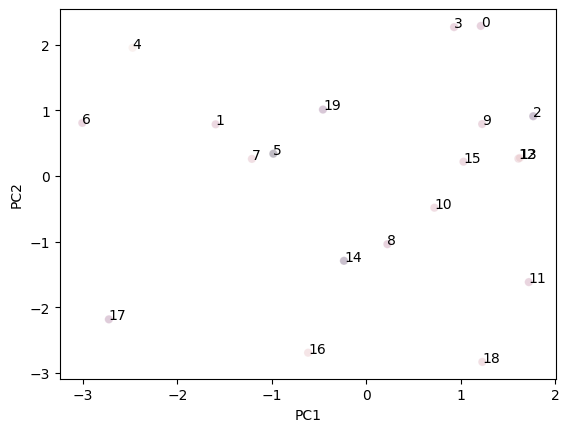

In [18]:
p1=sns.scatterplot(x="PC1", y="PC2",
              alpha=.3, 
              hue="PC6", legend=False,
              data=df2_pca);

# add annotations one by one with a loop
for line in range(0,df2_pca.shape[0]):
     p1.text(df2_pca.PC1[line], df2_pca.PC2[line], line, horizontalalignment='left', size='medium', color='black')


We conclude that 
 - centers 18,11 has a GOOD infrastructure but a BAD service
 - the group near 1,4,6 has BAD infrastructure but GOOD service quality 
 - the group 0,3,2,9 has GOOD infrastructure and service
 - center 17 has BAD infrastructure and service!

## mtcars

In [19]:
# Import CSV mtcars
cars = pd.read_csv('mtcars.csv',index_col = 0)

The car types are a mix that includes sedans (Datsun, Ford, Honda,…), luxury sedans (Mercedes, Cadellac,..), muscle cars (Javelin, Challenger, Camaro…) and high-end sports cars (Porsche, Lotus, Maserati, Ferrari…)

- 	mpg 	Miles/US Gallon 	mpg is the determinant of fuel efficiency
- 	cyl 	Number of cylinders 	Data includes vehicles with 4,6,8 cylinder engines.
- 	disp 	Displacement (cu.in.) 	Displacement measures overall volume in the engine as a factor of cylinder circumfrance, depth and total number of cylinders. This metric gives a good proxy for the total amount of power the engine can generate.
- 	hp 	Gross horsepower 	Gross horsepower measures the theoretical output of an engine’s power output
- 	drat 	Rear axle ratio 	The rear axle gear ratio indicates the number of turns of the drive shaft for every one rotation of the wheel axle. 
-   wt      weigth of the car 
- 	qsec 	1/4 mile time 	A performance measure, primarily of acceleration. Fastest time to travel 1/4 mile from standstill (in seconds).
- 	vs 	V/S 	Binary variable signaling the engine cylinder configuration a V-shape (vs=0) or Straight Line (vs=1). V==0 and S==1. 
- 	am 	Transmission Type 	A binary variable signaling whether vehicle has automatic (am=0) or manual (am=1) transmission configuration.
- 	gear 	Number of forward gears 	Number of gears in the transmission.
- 	carb 	Number of carburetors 	The number of carburetor barrels.

In [20]:
#cars.head()
cars.shape

(32, 11)

<Axes: >

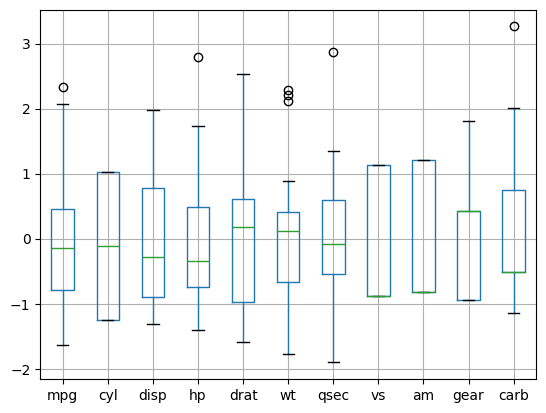

In [21]:
#dataset scaling and visualizing
from sklearn.preprocessing import StandardScaler
scaler3 = StandardScaler(copy=False) #or alternatively use MinMaxScaler
scaler3.fit(cars.astype(float)) 
df_cars=pd.DataFrame(scaler3.transform(cars.astype(float))) 
df_cars.columns=cars.columns
df_cars.boxplot()

In [22]:
from sklearn.decomposition import PCA
pca3 = PCA()
pca3.fit(df_cars)

PCA()

<Axes: >

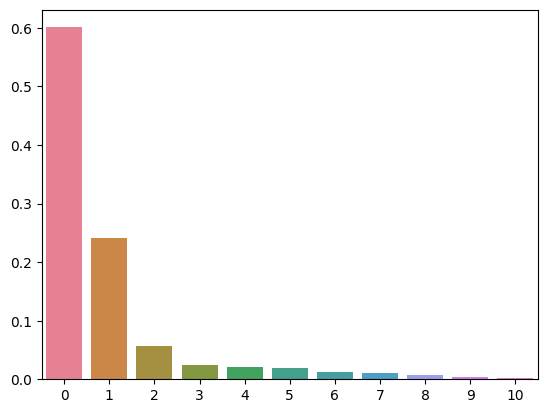

In [23]:
explained = pd.DataFrame(pca3.explained_variance_ratio_).transpose()
sns.barplot(data=explained)

In [24]:
pd.DataFrame(pca3.components_,columns=cars.columns)

,mpg,cyl,disp,hp,drat,wt,qsec,vs,am,gear,carb
0,-0.362531,0.373916,0.368185,0.330057,-0.294151,0.346103,-0.200456,-0.306511,-0.234943,-0.206916,0.214018
1,-0.016124,-0.043744,0.049324,-0.248784,-0.274694,0.143038,0.463375,0.231647,-0.429418,-0.462349,-0.413571
2,-0.225744,-0.175311,-0.061484,0.140015,0.161189,0.341819,0.403169,0.428815,-0.205767,0.289780,0.528545
3,-0.022540,-0.002592,0.256608,-0.067676,0.854829,0.245899,0.068077,-0.214849,-0.030463,-0.264691,-0.126789
4,0.102845,0.058484,0.393995,0.540047,0.077327,-0.075029,-0.164666,0.599540,0.089781,0.048330,-0.361319
5,0.108797,-0.168554,0.336165,-0.071436,-0.244497,0.464940,0.330480,-0.194017,0.570817,0.243563,-0.183522
6,0.367724,0.057278,0.214303,-0.001496,0.021120,-0.020668,0.050011,-0.265781,-0.587305,0.605098,-0.174603
7,0.754091,0.230825,-0.001142,0.222358,-0.032194,0.008572,0.231840,-0.025935,0.059747,-0.336150,0.395629
8,-0.235702,-0.054035,-0.198428,0.575830,0.046901,-0.359498,0.528377,-0.358583,0.047404,0.001735,-0.170641
9,-0.139285,0.846419,-0.049380,-0.247824,0.101494,-0.094394,0.270673,0.159039,0.177785,0.213825,-0.072260


In [25]:
cars_pca = pd.DataFrame(pca3.transform(df_cars),columns = ['pc1', 'pc2','pc3','pc4','pc5', 'pc6','pc7','pc8','pc9','pc10','pc11']
                        ,index=cars.index.values)
cars_pca.head()

,pc1,pc2,pc3,pc4,pc5,pc6,pc7,pc8,pc9,pc10,pc11
Mazda RX4,-0.657213,-1.735446,-0.601199,0.115522,-0.960653,0.017259,-0.433311,0.009785,-0.148766,0.067771,0.182569
Mazda RX4 Wag,-0.629396,-1.550033,-0.382322,0.202307,-1.032949,0.245592,-0.422860,0.085873,-0.075721,0.128959,0.090063
Datsun 710,-2.779397,0.146457,-0.241238,-0.249139,0.405143,0.354348,-0.618584,-0.594620,0.133328,-0.046470,-0.096147
Hornet 4 Drive,-0.311771,2.363019,-0.135759,-0.511862,0.557997,-0.019606,-0.041007,0.050376,-0.223742,0.061366,0.149973
Hornet Sportabout,1.974489,0.754402,-1.134402,0.075653,0.210836,-0.151580,0.389645,0.162863,0.021515,0.060787,0.148750


C:\Users\danil\AppData\Local\Temp\ipykernel_1632\1266609555.py:6: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  p2.text(cars_pca.pc1[line], cars_pca.pc2[line], cars_pca.index[line], horizontalalignment='left', size='medium', color='black')


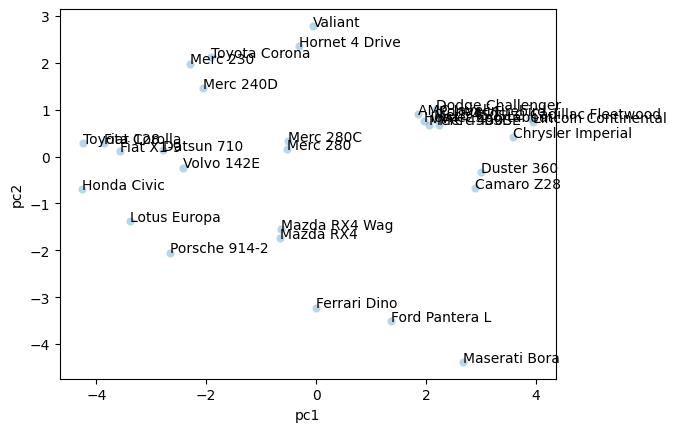

In [26]:
p2=sns.scatterplot(x="pc1", y="pc2",
              alpha=.3,
              data=cars_pca);
# add annotations one by one with a loop
for line in range(0,cars_pca.shape[0]):
     p2.text(cars_pca.pc1[line], cars_pca.pc2[line], cars_pca.index[line], horizontalalignment='left', size='medium', color='black')


## Iris database

In [27]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn import datasets

iris = datasets.load_iris()


In [28]:
print(iris['DESCR'])

.. _iris_dataset:

Iris plants dataset
--------------------

**Data Set Characteristics:**

:Number of Instances: 150 (50 in each of three classes)
:Number of Attributes: 4 numeric, predictive attributes and the class
:Attribute Information:
    - sepal length in cm
    - sepal width in cm
    - petal length in cm
    - petal width in cm
    - class:
            - Iris-Setosa
            - Iris-Versicolour
            - Iris-Virginica

:Summary Statistics:

============== ==== ==== ======= ===== ====================
                Min  Max   Mean    SD   Class Correlation
============== ==== ==== ======= ===== ====================
sepal length:   4.3  7.9   5.84   0.83    0.7826
sepal width:    2.0  4.4   3.05   0.43   -0.4194
petal length:   1.0  6.9   3.76   1.76    0.9490  (high!)
petal width:    0.1  2.5   1.20   0.76    0.9565  (high!)
============== ==== ==== ======= ===== ====================

:Missing Attribute Values: None
:Class Distribution: 33.3% for each of 3 classes.
:Cr

In [29]:
#create the dataframe
iris_df = pd.DataFrame(iris.data)
iris_df.columns = iris.feature_names

<Axes: >

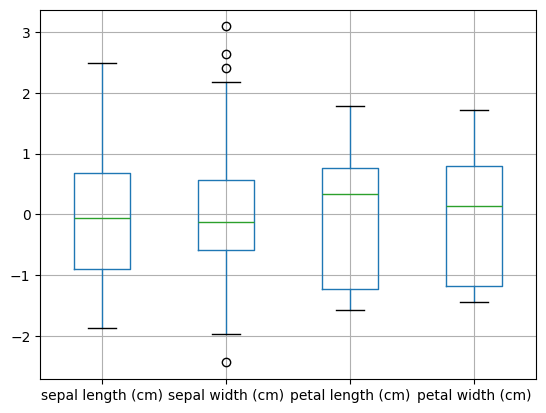

In [30]:
from sklearn.preprocessing import StandardScaler
iris_scaler = StandardScaler(copy=False) #or alternatively use MinMaxScaler
iris_scaler.fit(iris_df) # 
iris_scaler.transform(iris_df)
iris_df.boxplot()

In [31]:
#PCA fit
from sklearn.decomposition import PCA
pca = PCA()
pca.fit(iris_df)

PCA()

In [32]:
#VISUALIZE The percentage of variance explained by each of the selected components.
pd.DataFrame(pca.explained_variance_ratio_).transpose()


,0,1,2,3
0,0.729624,0.228508,0.036689,0.005179


<Axes: >

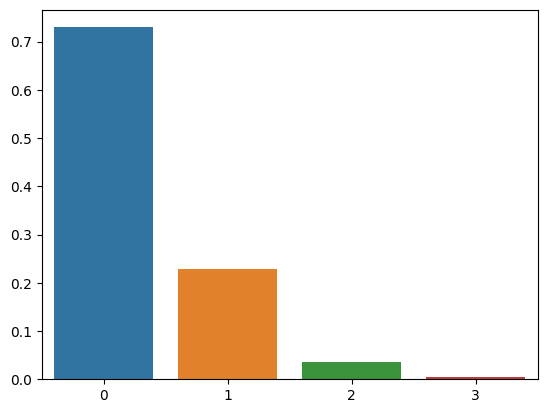

In [33]:
explained = pd.DataFrame(pca.explained_variance_ratio_).transpose()
sns.barplot(data=explained)

In [34]:
pd.DataFrame(pca.components_,columns=iris_df.columns)

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm)
0,0.521066,-0.269347,0.580413,0.564857
1,0.377418,0.923296,0.024492,0.066942
2,0.719566,-0.244382,-0.142126,-0.634273
3,-0.261286,0.123510,0.801449,-0.523597


In [35]:
# Let see the coordinates of the data in the PCA 
iris_pca = pd.DataFrame(pca.transform(iris_df),columns = ['pc1', 'pc2','pc3','pc4']
                        ,index=iris_df.index.values)
iris_pca 


,pc1,pc2,pc3,pc4
0,-2.264703,0.480027,0.127706,-0.024168
1,-2.080961,-0.674134,0.234609,-0.103007
2,-2.364229,-0.341908,-0.044201,-0.028377
3,-2.299384,-0.597395,-0.091290,0.065956
4,-2.389842,0.646835,-0.015738,0.035923
...,...,...,...,...
145,1.870503,0.386966,-0.256274,-0.389257
146,1.564580,-0.896687,0.026371,-0.220192
147,1.521170,0.269069,-0.180178,-0.119171
148,1.372788,1.011254,-0.933395,-0.026129


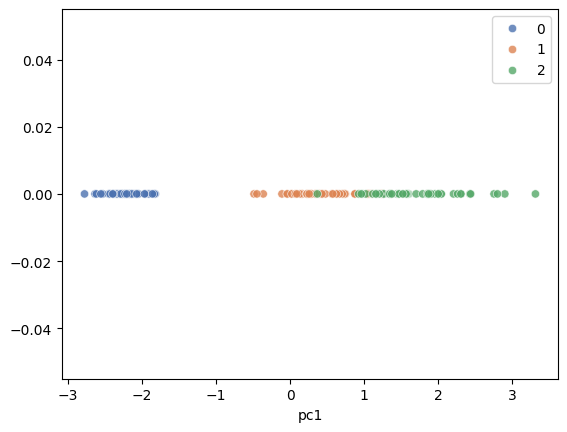

In [ ]:
# The data in the first PCA 
sns.scatterplot(x="pc1", y=0,
              hue=iris['target'], alpha=.8,
              data=iris_pca,
              palette="deep");

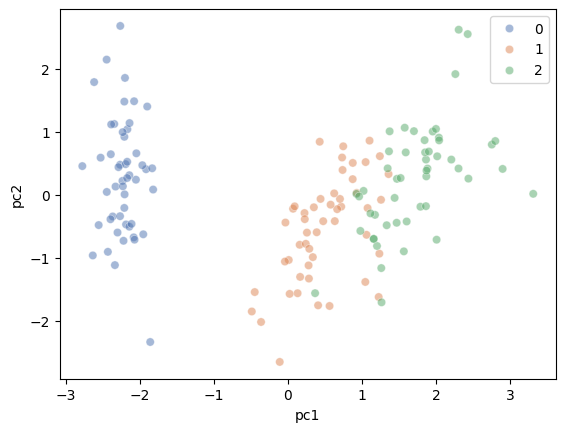

In [37]:
# The data in the first two PCA 
sns.scatterplot(x="pc1", y="pc2",
              hue=iris['target'], alpha=0.5,
              data=iris_pca,
               palette='deep');